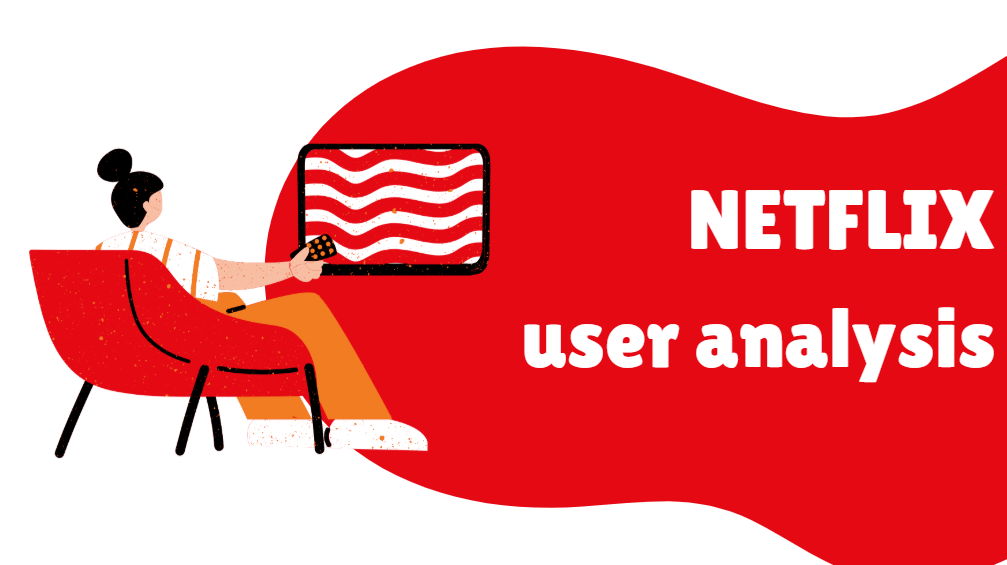

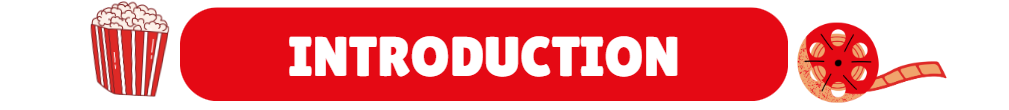


In today’s digital era, understanding user behavior has become crucial for businesses to enhance user engagement and optimize services. **Netflix**, as one of the world’s leading online streaming platforms, serves millions of users daily, generating vast amounts of data through viewing patterns, preferences, and interactions.




This project focuses on **analyzing Netflix user behavior** to uncover meaningful insights about user preferences, popular genres, content consumption trends, and viewing habits. By leveraging data analysis and visualization techniques, this study aims to assist in identifying key factors that influence user engagement, retention, and content popularity on the platform.


This dataset contains **25,000 fictional Netflix user** records generated for analysis, visualization, and machine learning practice. It includes demographic details, subscription type, watch time, and login history for each user.


* **User\_ID** – Unique identifier for each user
* **Name** – Randomly generated name
* **Age** – Age of the user (13 to 80)
* **Country** – User’s country (randomly chosen from 10 options)
* **Subscription\_Type** – Type of Netflix plan (*Basic*, *Standard*, *Premium*)
* **Watch\_Time\_Hours** – Total hours watched in the last month
* **Favorite\_Genre** – User’s preferred genre
* **Last\_Login** – Last recorded login date within the past year


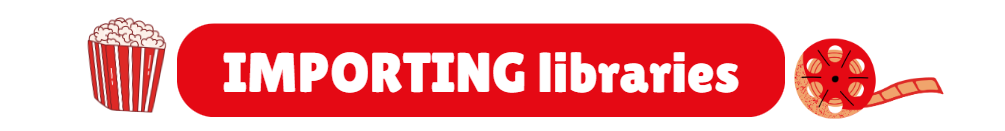

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn.objects as so
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
%matplotlib inline
from pandas.api.types import CategoricalDtype

In [2]:
df = pd.read_csv('netflix_users.csv')

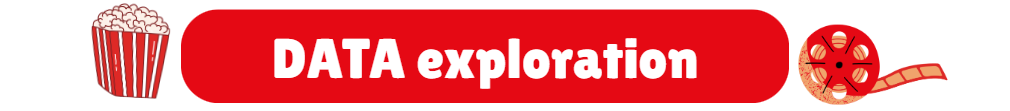

In [3]:
df.head()

User_ID            Name  Age Country Subscription_Type  Watch_Time_Hours  \
0        1  James Martinez   18  France           Premium             80.26   
1        2     John Miller   23     USA           Premium            321.75   
2        3      Emma Davis   60      UK             Basic             35.89   
3        4     Emma Miller   44     USA           Premium            261.56   
4        5      Jane Smith   68     USA          Standard            909.30   

  Favorite_Genre  Last_Login  
0          Drama  2024-05-12  
1         Sci-Fi  2025-02-05  
2         Comedy  2025-01-24  
3    Documentary  2024-03-25  
4          Drama  2025-01-14

In [4]:
df.describe()

User_ID           Age  Watch_Time_Hours
count  25000.000000  25000.000000      25000.000000
mean   12500.500000     46.482880        500.468858
std     7217.022701     19.594861        286.381815
min        1.000000     13.000000          0.120000
25%     6250.750000     29.000000        256.567500
50%    12500.500000     46.000000        501.505000
75%    18750.250000     63.000000        745.732500
max    25000.000000     80.000000        999.990000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   User_ID            25000 non-null  int64  
 1   Name               25000 non-null  object 
 2   Age                25000 non-null  int64  
 3   Country            25000 non-null  object 
 4   Subscription_Type  25000 non-null  object 
 5   Watch_Time_Hours   25000 non-null  float64
 6   Favorite_Genre     25000 non-null  object 
 7   Last_Login         25000 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 1.5+ MB


In [6]:
df['Last_Login'].isna().any()

False

In [7]:
df.isnull().any()

User_ID              False
Name                 False
Age                  False
Country              False
Subscription_Type    False
Watch_Time_Hours     False
Favorite_Genre       False
Last_Login           False
dtype: bool

In [8]:
bins = [12, 20, 30, 40, 50, 60, 70, 81]
labels = ['13-20','20-30','30-40','40-50','50-60','60-70','70-80']

df['Age_Category'] = pd.cut(df['Age'], bins=bins, labels=labels, right= True)

In [9]:
bins2 = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
labels2 = ['0-100','100-200','200-300','300-400','400-500','500-600','600-700','700-800','800-900','900-1000']

df['Category_Hours'] = pd.cut(df['Watch_Time_Hours'], bins=bins2, labels=labels2, right= True)

In [10]:
df.head()

User_ID            Name  Age Country Subscription_Type  Watch_Time_Hours  \
0        1  James Martinez   18  France           Premium             80.26   
1        2     John Miller   23     USA           Premium            321.75   
2        3      Emma Davis   60      UK             Basic             35.89   
3        4     Emma Miller   44     USA           Premium            261.56   
4        5      Jane Smith   68     USA          Standard            909.30   

  Favorite_Genre  Last_Login Age_Category Category_Hours  
0          Drama  2024-05-12        13-20          0-100  
1         Sci-Fi  2025-02-05        20-30        300-400  
2         Comedy  2025-01-24        50-60          0-100  
3    Documentary  2024-03-25        40-50        200-300  
4          Drama  2025-01-14        60-70       900-1000

In [11]:
df.isnull().any()

User_ID              False
Name                 False
Age                  False
Country              False
Subscription_Type    False
Watch_Time_Hours     False
Favorite_Genre       False
Last_Login           False
Age_Category         False
Category_Hours       False
dtype: bool

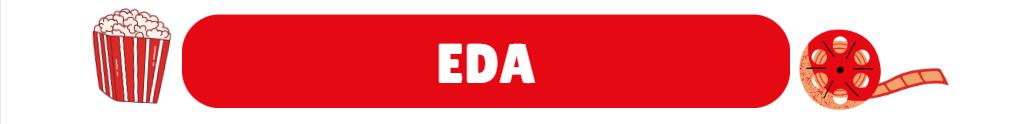

In [12]:
red = [0.89, 0.035, 0.078]
black = [0, 0, 0]
cmap = mcolors.LinearSegmentedColormap.from_list("red_to_black", [red, black], N=256)

In [13]:
corr_df = df[['Age', 'Watch_Time_Hours']].corr()

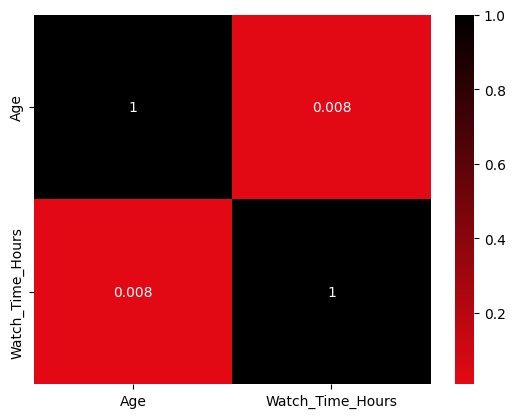

In [14]:
sns.heatmap(corr_df, annot=True, cmap=cmap)
plt.show()

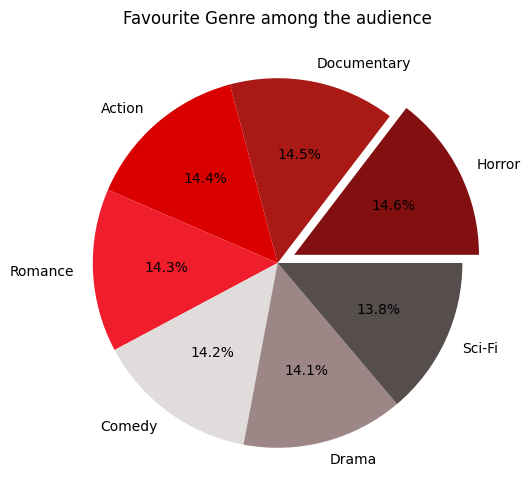

In [15]:
genre_type = df['Favorite_Genre'].value_counts()
plt.figure(figsize=(6,6))
genre_colors = ['#831010','#A91916','#db0000','#f01e2c','#e1dcdc','#9C8686','#564d4d']
explode = [0.1] +[0]*6
plt.pie(genre_type, labels= genre_type.index, explode=explode, autopct='%1.1f%%', colors=genre_colors)
plt.title('Favourite Genre among the audience')
plt.show()

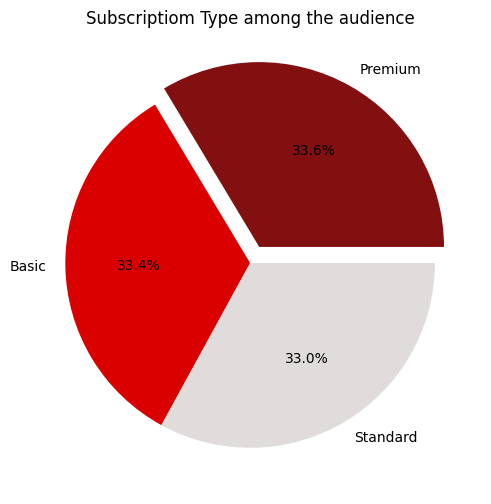

In [16]:
sub_type = df['Subscription_Type'].value_counts()
plt.figure(figsize=(6,6))
sub_type_colors = ['#831010','#db0000','#e1dcdc']
explode = [0.1] +[0]*2
plt.pie(sub_type, labels= sub_type.index, explode=explode, autopct='%1.1f%%', colors=sub_type_colors)
plt.title('Subscriptiom Type among the audience')
plt.show()

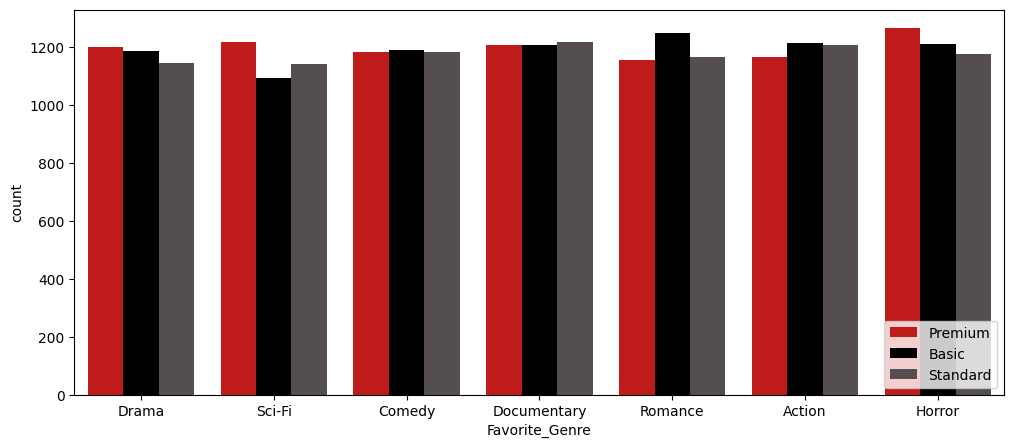

In [17]:
sub_colors = ['#db0000','#000000','#564d4d']
plt.figure(figsize=(12,5))
sns.countplot(df, x='Favorite_Genre', hue='Subscription_Type', palette=sub_colors)
plt.legend(loc='lower right')
plt.show()

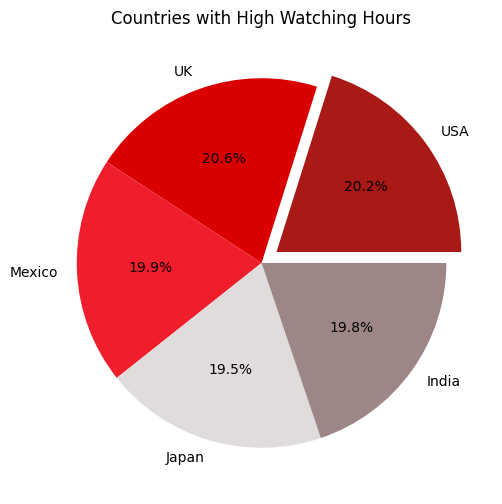

In [18]:
top_df = df.groupby('Country').agg({'Watch_Time_Hours':'sum', 'Subscription_Type':'first','Age':'mean'}).sort_values(by='Country', ascending=False).reset_index()
top_5 = top_df.head()
plt.figure(figsize=(6,6))
top_colors = ['#A91916','#db0000','#f01e2c','#e1dcdc','#9C8686']
explode = [0.1] +[0]*4
plt.pie(top_5['Watch_Time_Hours'], labels= top_df['Country'].head(), explode=explode, autopct='%1.1f%%', colors=top_colors)
plt.title('Countries with High Watching Hours')
plt.show()

C:\Users\anis7\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\anis7\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


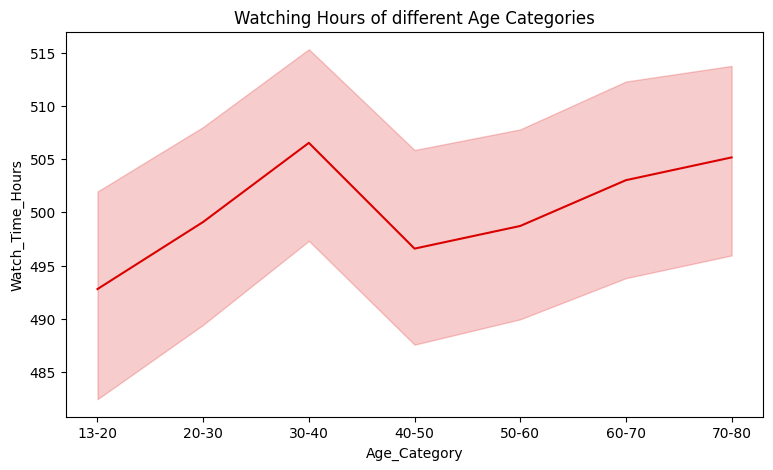

In [19]:
plt.figure(figsize=(9,5))
sns.lineplot(df, x='Age_Category', y='Watch_Time_Hours', color='#db0000')
plt.title('Watching Hours of different Age Categories')
plt.show()

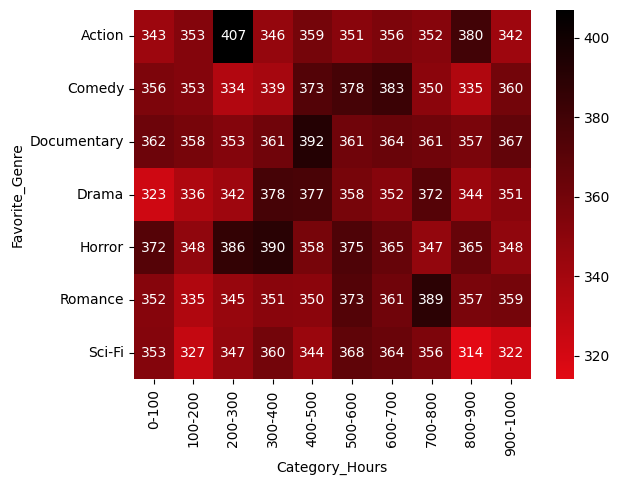

In [20]:
sns.heatmap(pd.crosstab(df['Favorite_Genre'], df['Category_Hours']), annot=True, fmt='d', cmap=cmap)
plt.show()

In [21]:
date_df = df.groupby('Last_Login').agg({'Watch_Time_Hours':'sum', 'Age':'mean', 'Category_Hours':'first', 'Subscription_Type':'first'}).sort_values(by='Last_Login', ascending=True).reset_index()

In [22]:
date_df.head()

Last_Login  Watch_Time_Hours        Age Category_Hours Subscription_Type
0  2024-03-08          39722.26  48.178082        400-500           Premium
1  2024-03-09          28812.52  43.754098          0-100           Premium
2  2024-03-10          30631.92  46.254545       900-1000          Standard
3  2024-03-11          28173.21  43.435484        500-600             Basic
4  2024-03-12          28551.39  43.383333        700-800             Basic

C:\Users\anis7\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


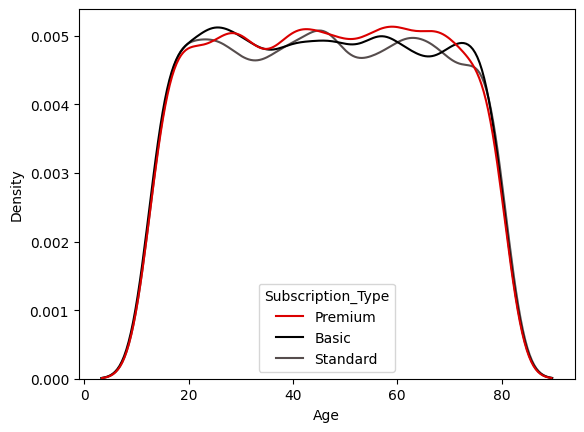

In [23]:
sns.kdeplot(df, x='Age',hue='Subscription_Type', palette=sub_colors)
plt.show()

In [24]:
df['Country'].unique()

array(['France', 'USA', 'UK', 'Canada', 'Mexico', 'Japan', 'Australia',
       'Germany', 'Brazil', 'India'], dtype=object)

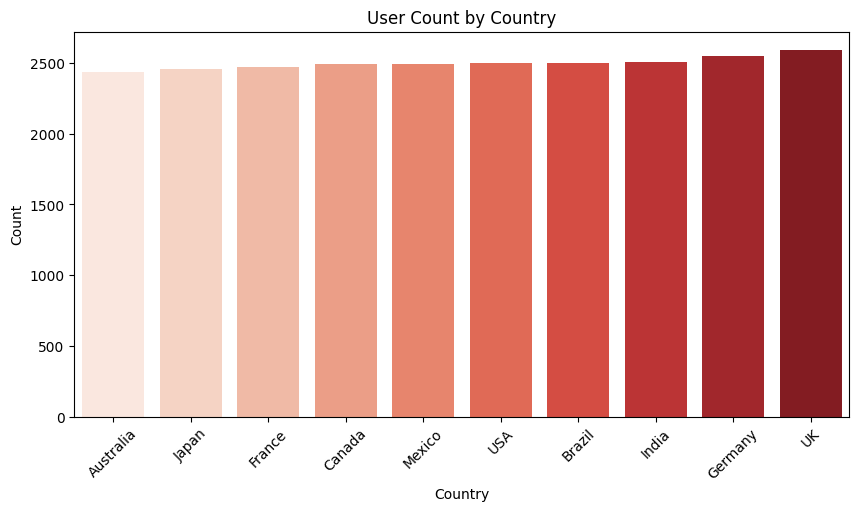

In [25]:
countries = df['Country'].value_counts().sort_values().reset_index()
countries.columns = ['Country', 'Count']
plt.figure(figsize=(10,5))
sns.barplot(data=countries, x='Country', y='Count', palette='Reds')
plt.title("User Count by Country")
plt.xticks(rotation=45)
plt.show()

C:\Users\anis7\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


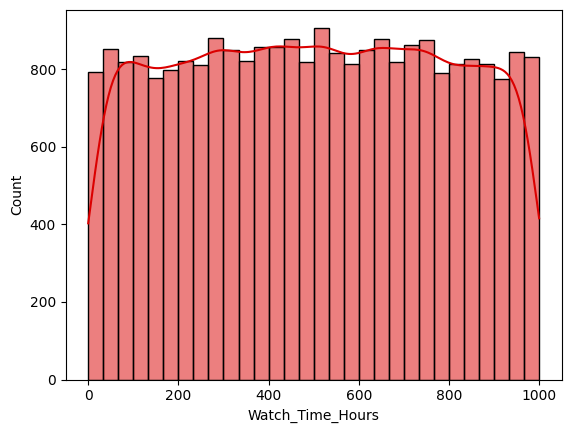

In [26]:
sns.histplot(df, x='Watch_Time_Hours', kde=True, color='#db0000')
plt.show()

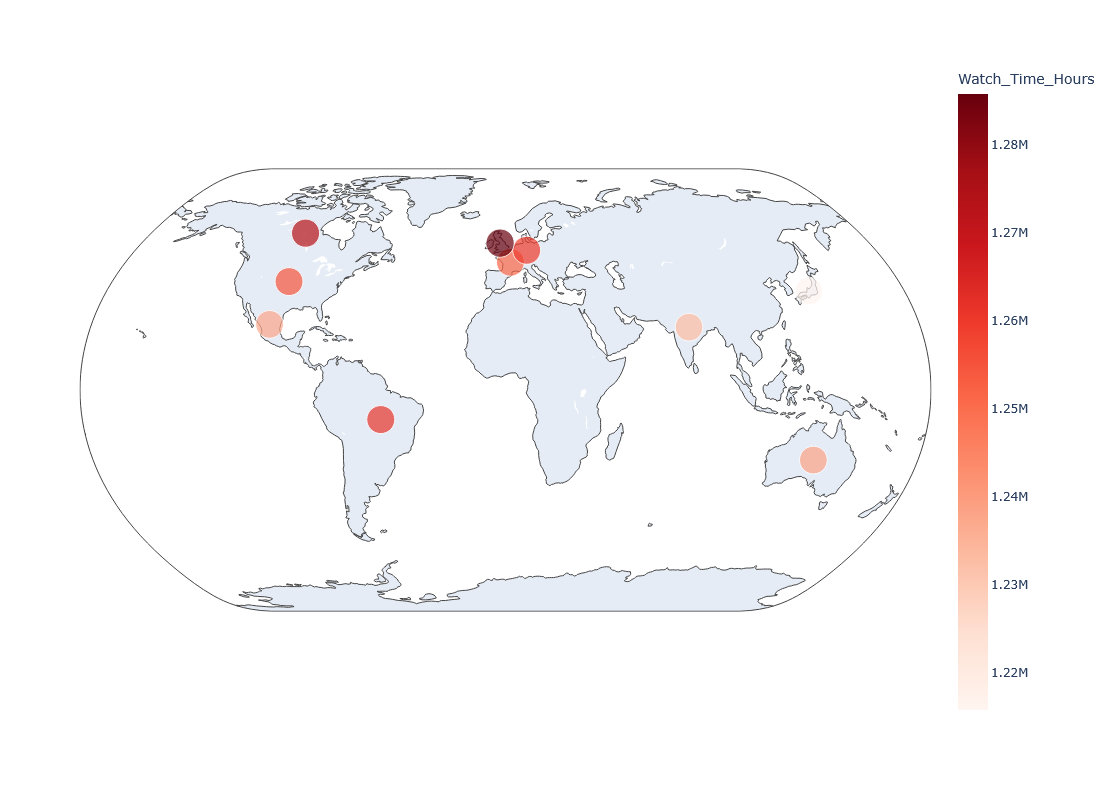

In [27]:
import plotly.express as px
c_df = top_df.groupby('Country')['Watch_Time_Hours'].sum().round(2).reset_index()
fig = px.scatter_geo(c_df, locations="Country", color="Watch_Time_Hours",
                     hover_name="Country", size="Watch_Time_Hours", color_continuous_scale='reds',
                     projection="natural earth", locationmode = "country names")
fig.update_layout(width=1000, height=800)
fig.show()

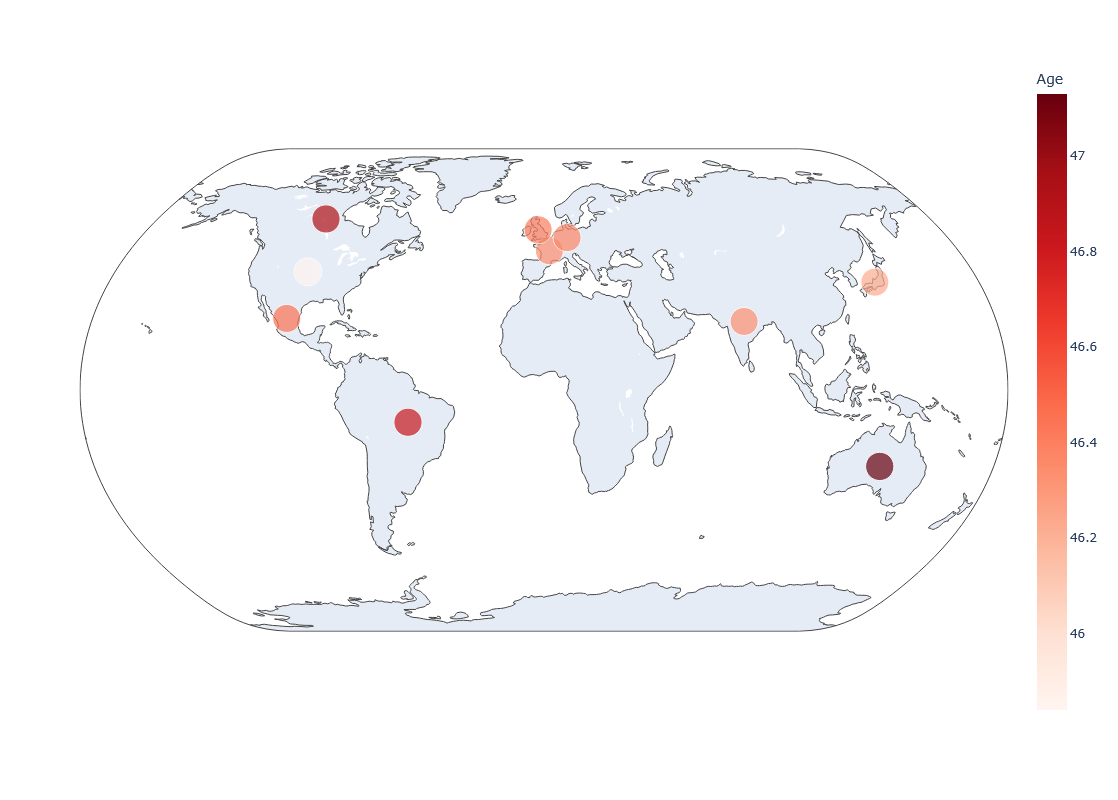

In [28]:
import plotly.express as px
age_df = top_df.groupby('Country')['Age'].sum().round(2).reset_index()
fig = px.scatter_geo(age_df, locations="Country", color="Age",
                     hover_name="Country", size="Age", color_continuous_scale='reds',
                     projection="natural earth", locationmode = "country names")
fig.update_layout(width=1000, height=800)
fig.show()

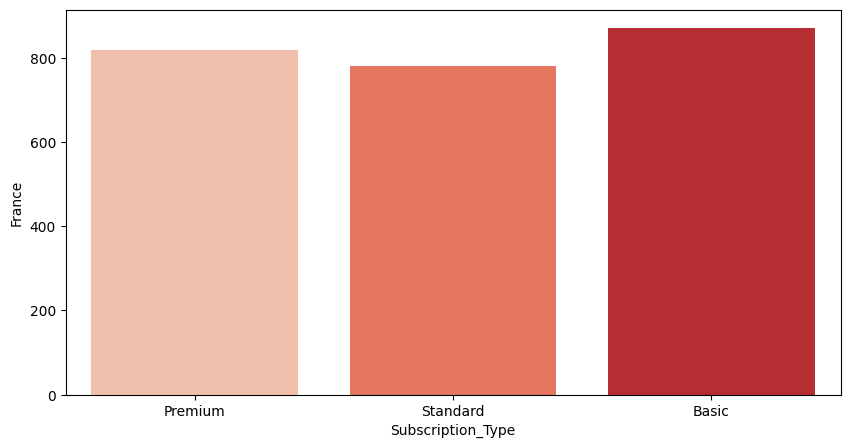

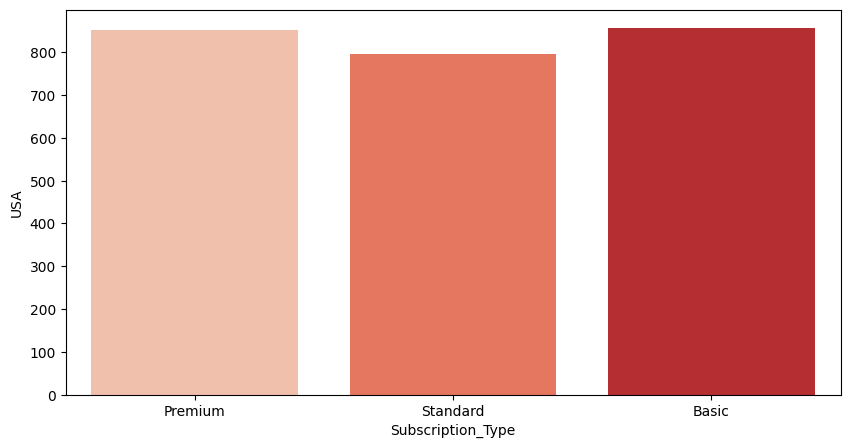

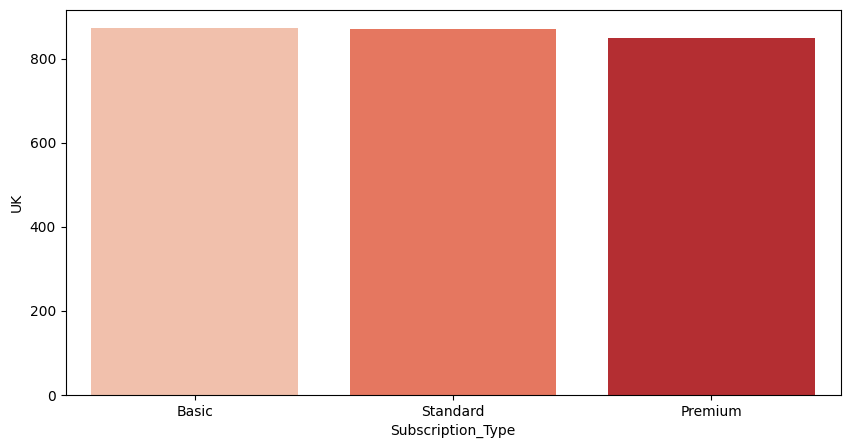

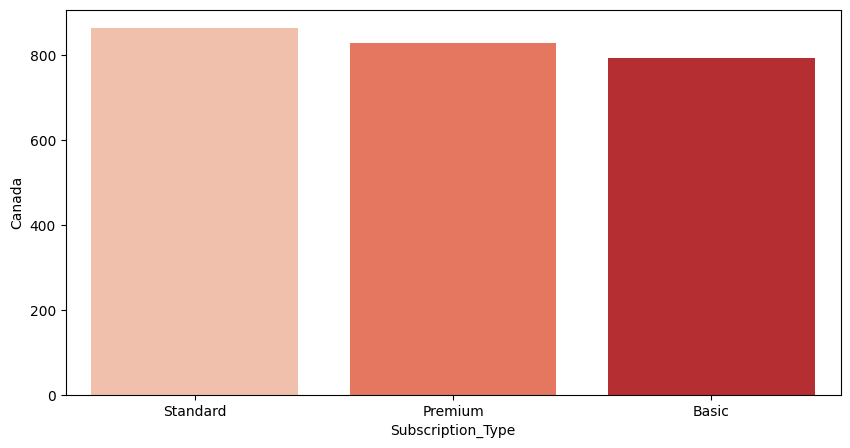

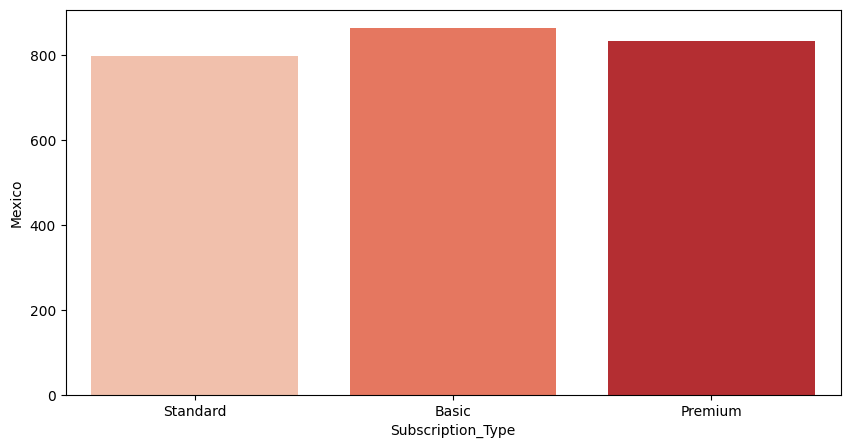

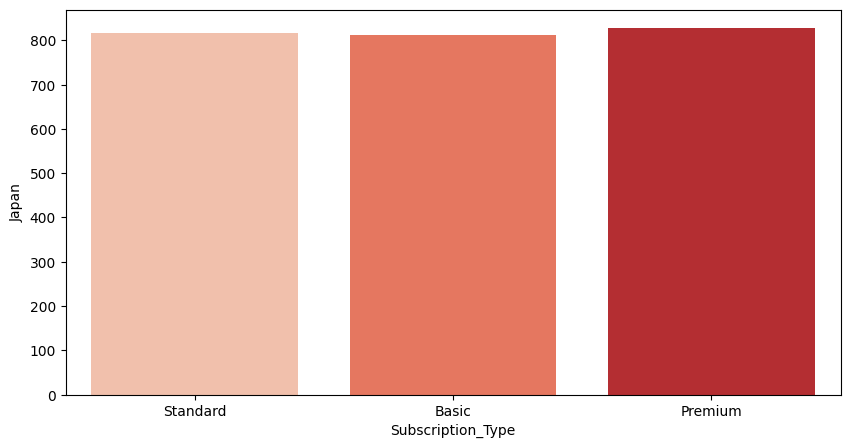

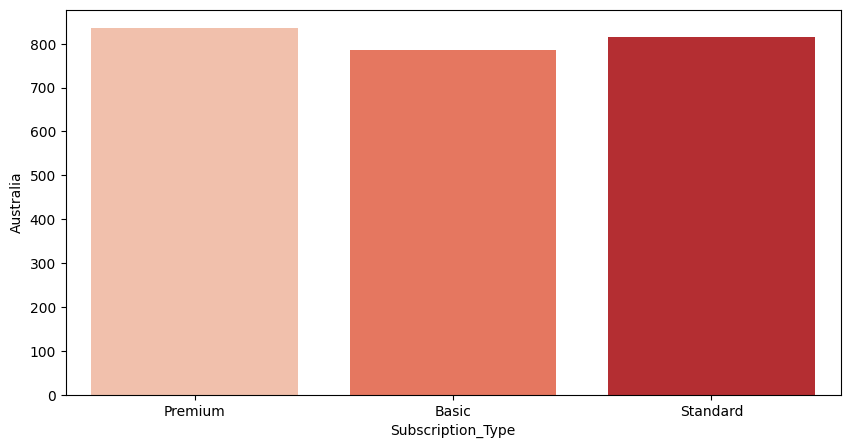

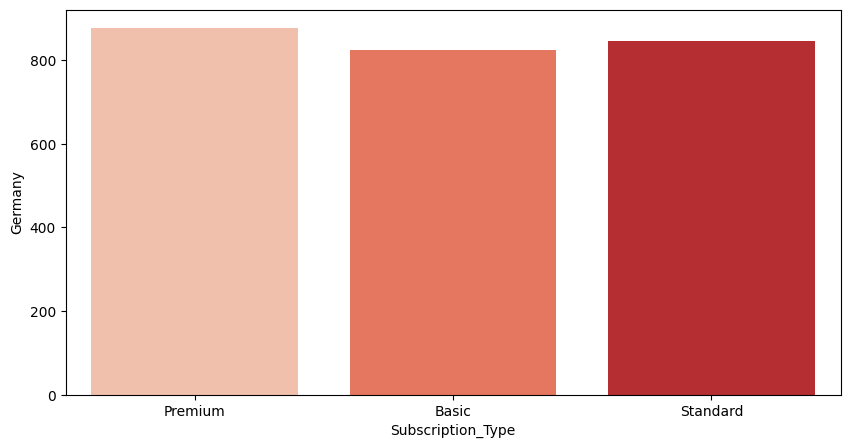

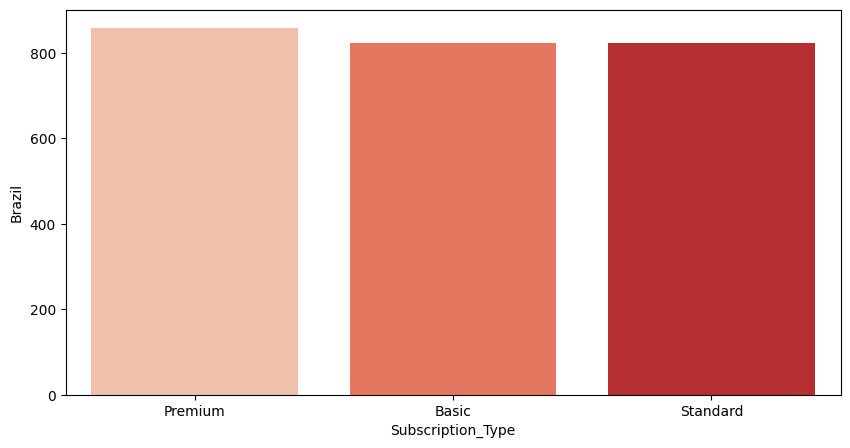

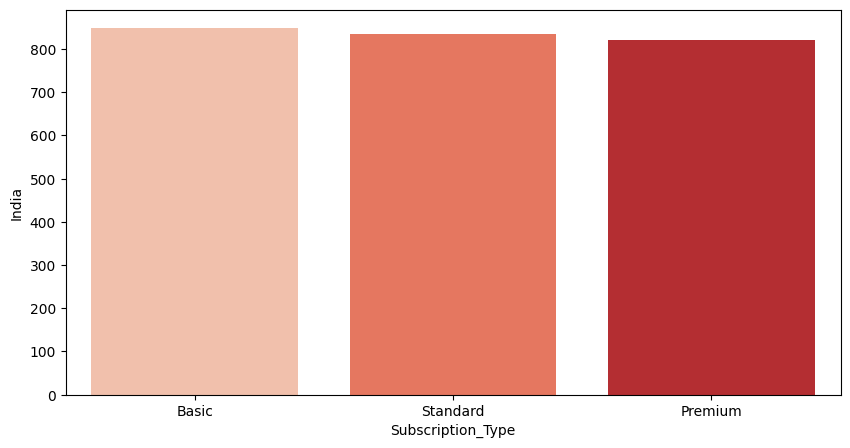

In [29]:
net_countries = df['Country'].unique()
for n in net_countries:
        d = df[df['Country'] == n]
        plt.figure(figsize=(10,5))
        sns.countplot(d, x='Subscription_Type', palette='Reds')
        plt.ylabel(n)
        plt.show()

C:\Users\anis7\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



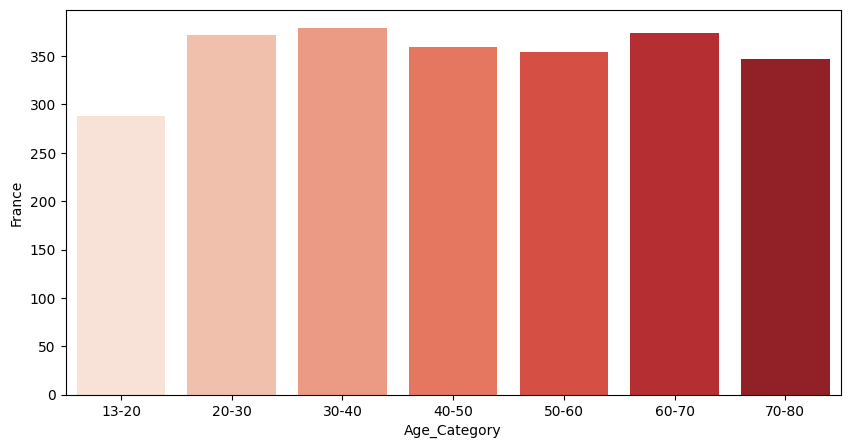

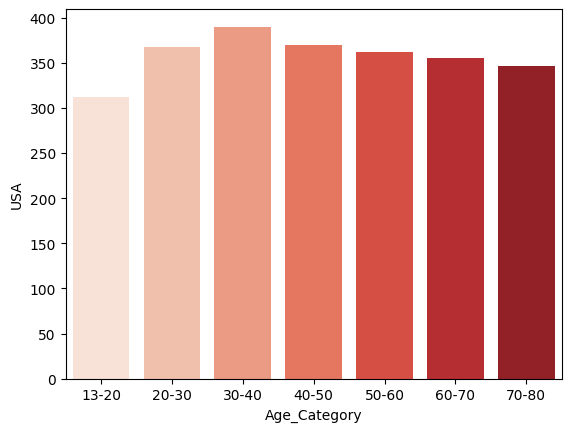

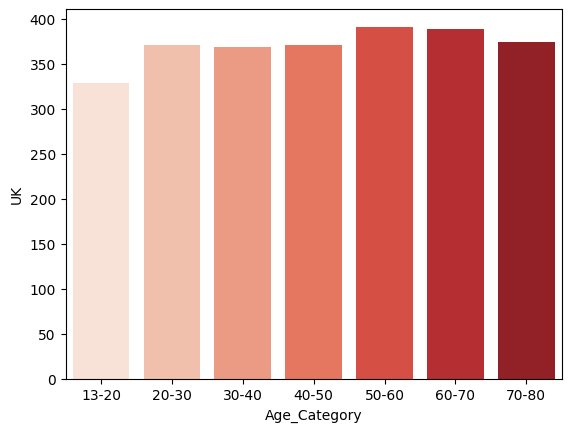

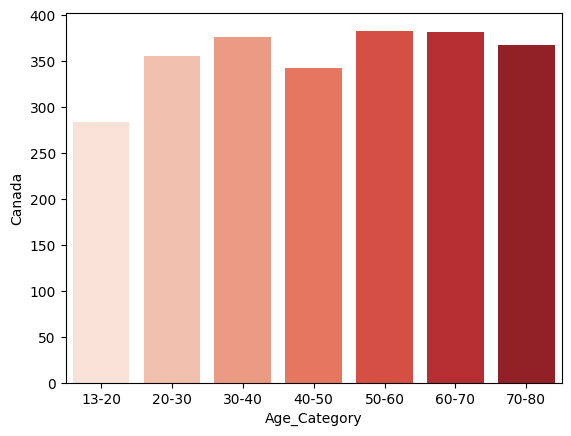

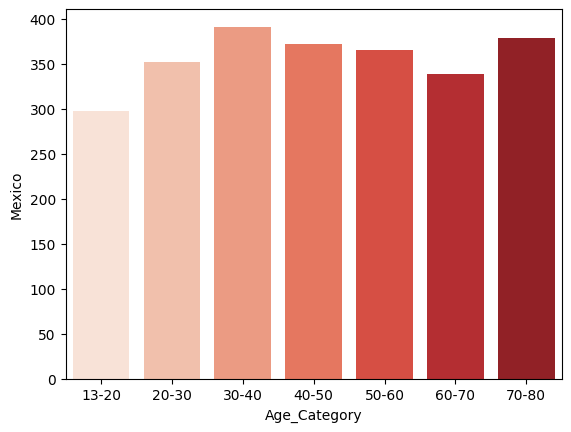

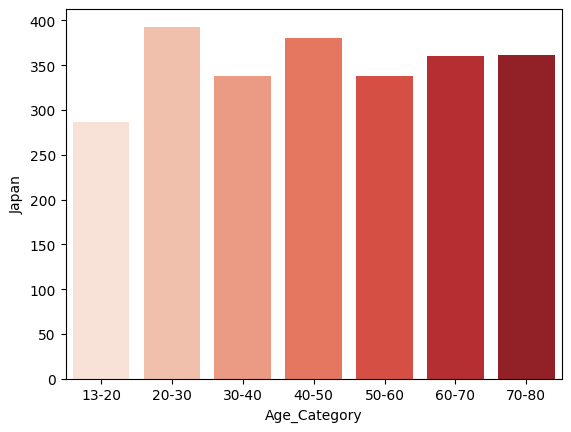

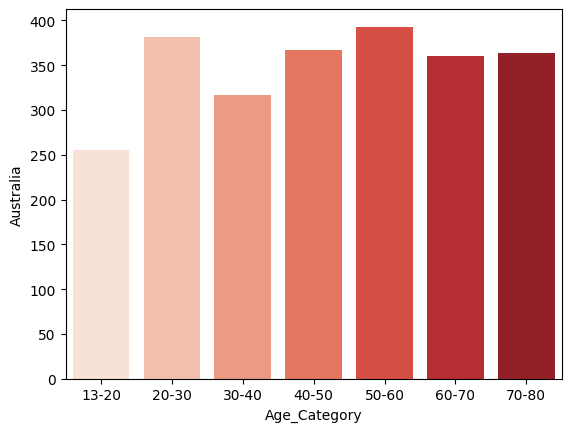

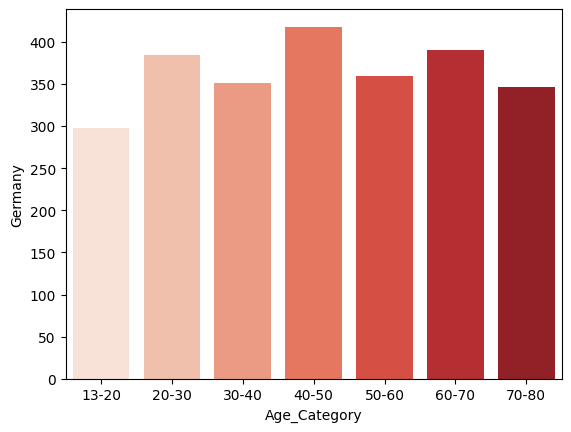

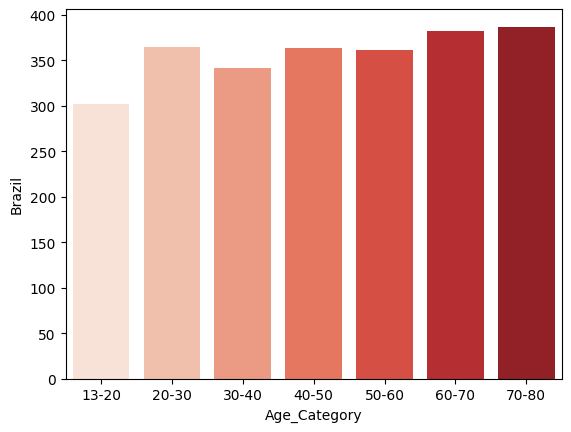

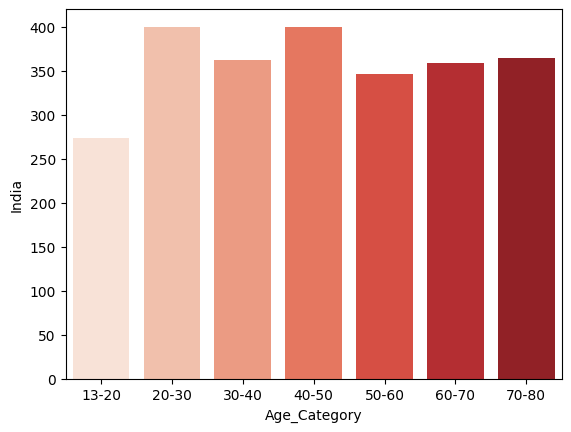

In [30]:
plt.figure(figsize=(10,5))
net_countries = df['Country'].unique()
for n in net_countries:
        d = df[df['Country'] == n]
        sns.countplot(d, x='Age_Category', palette='Reds')
        plt.ylabel(n)
        plt.show()

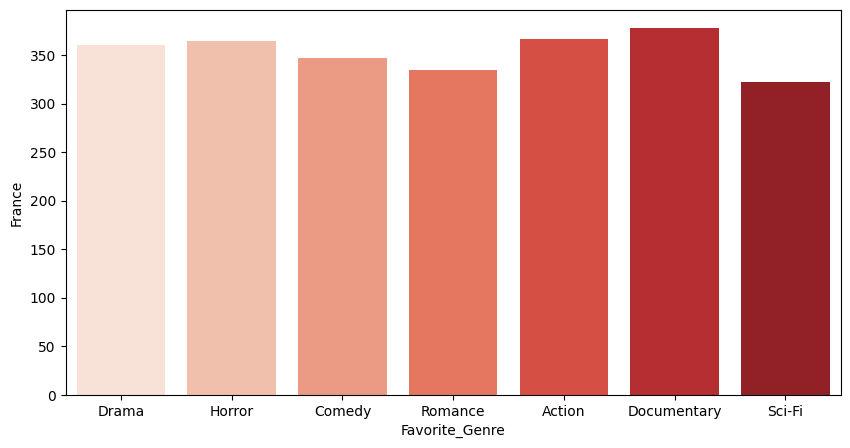

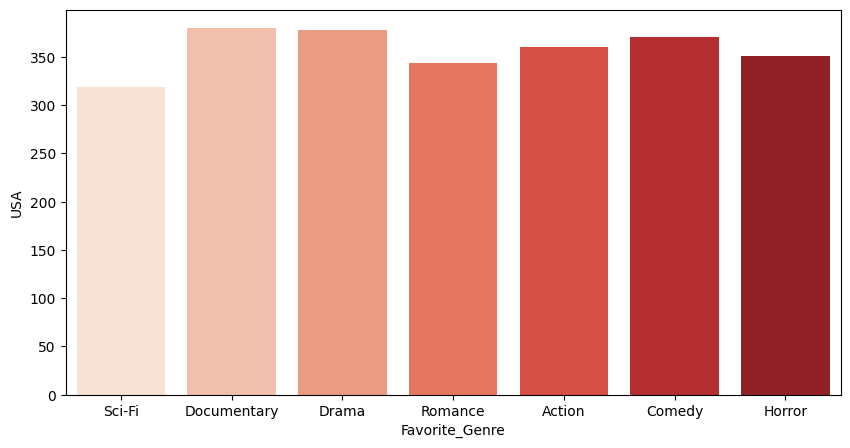

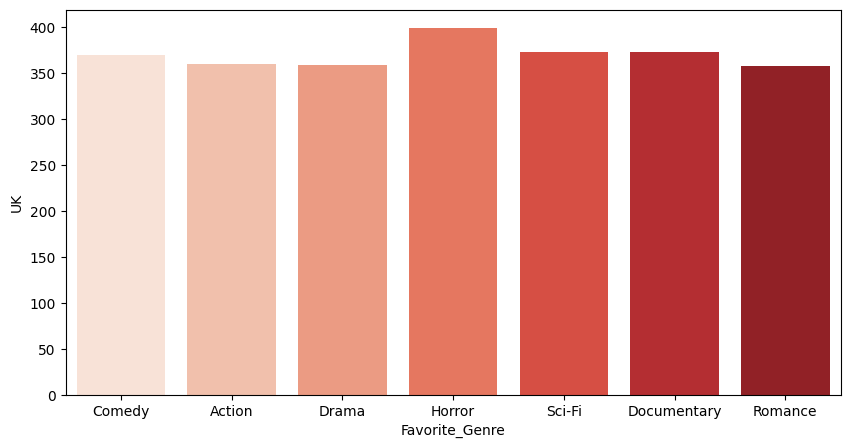

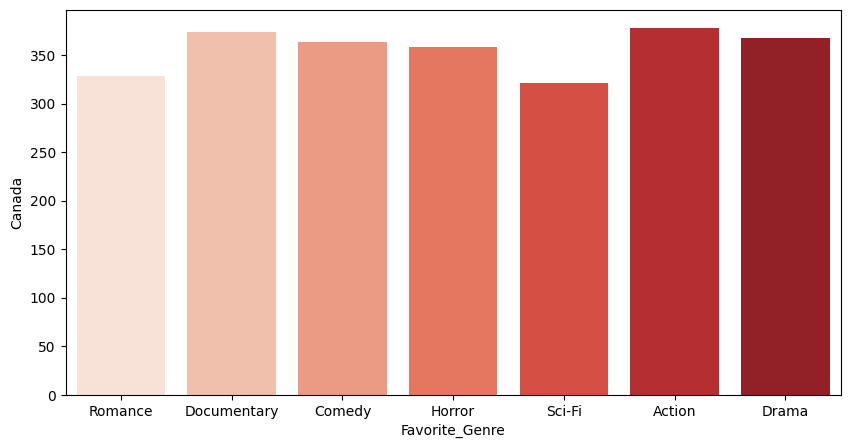

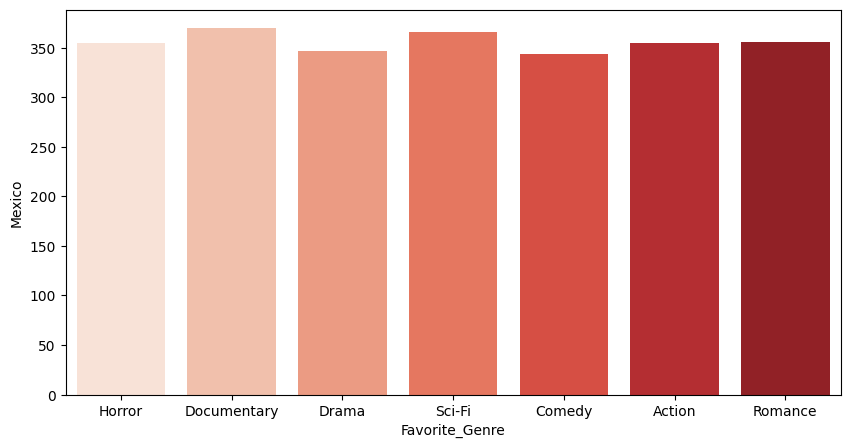

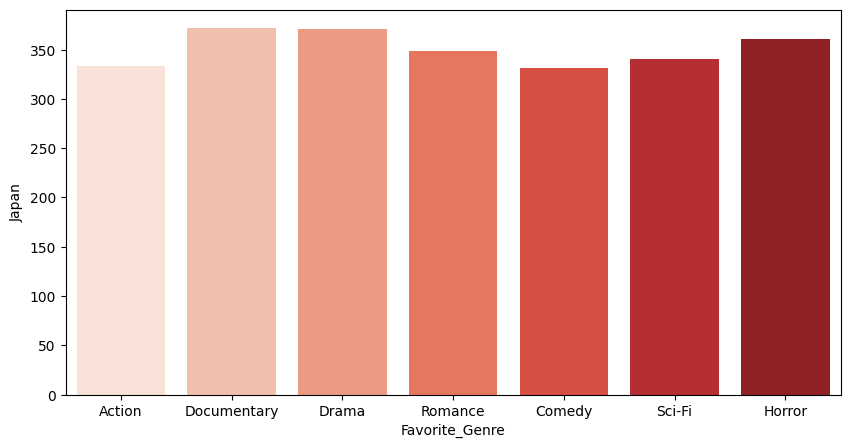

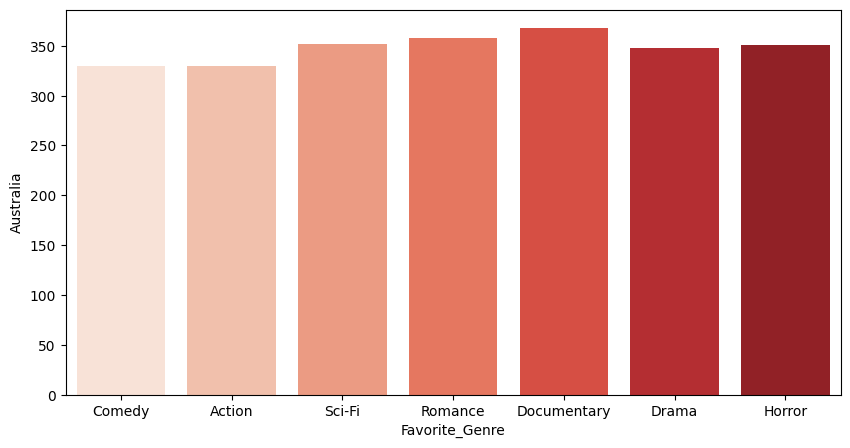

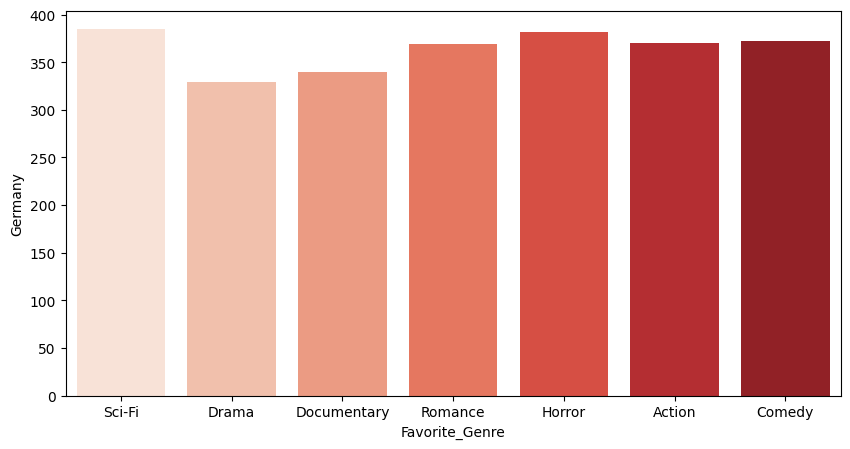

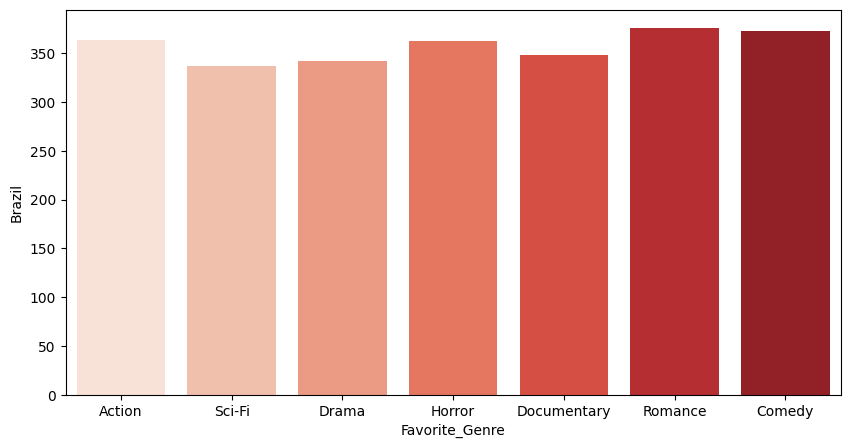

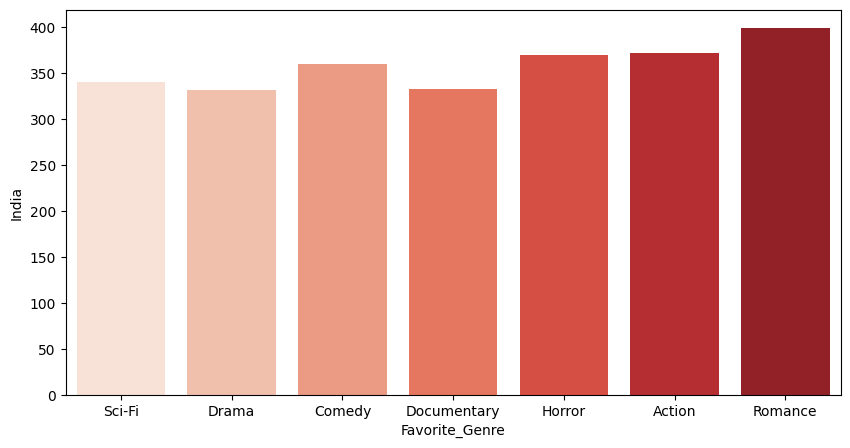

In [31]:
net_countries = df['Country'].unique()
for n in net_countries:
        d = df[df['Country'] == n]
        plt.figure(figsize=(10,5))
        sns.countplot(d, x='Favorite_Genre', palette='Reds')
        plt.ylabel(n)
        plt.show()

C:\Users\anis7\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



<Figure size 1500x500 with 0 Axes>

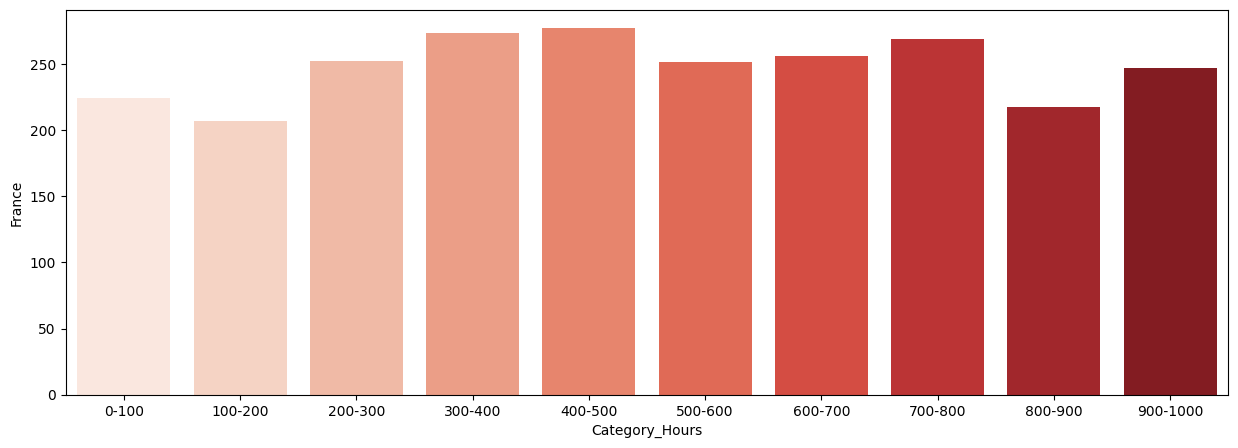

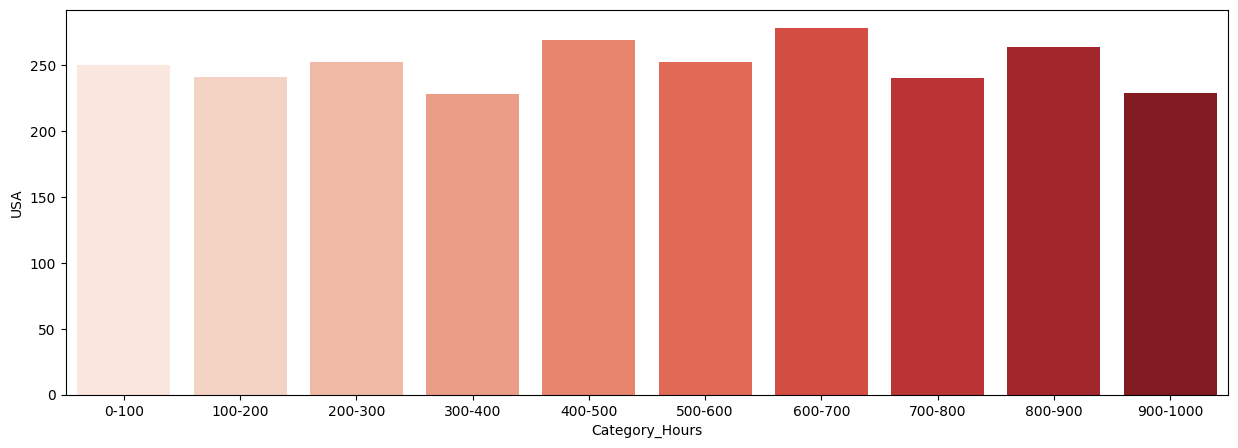

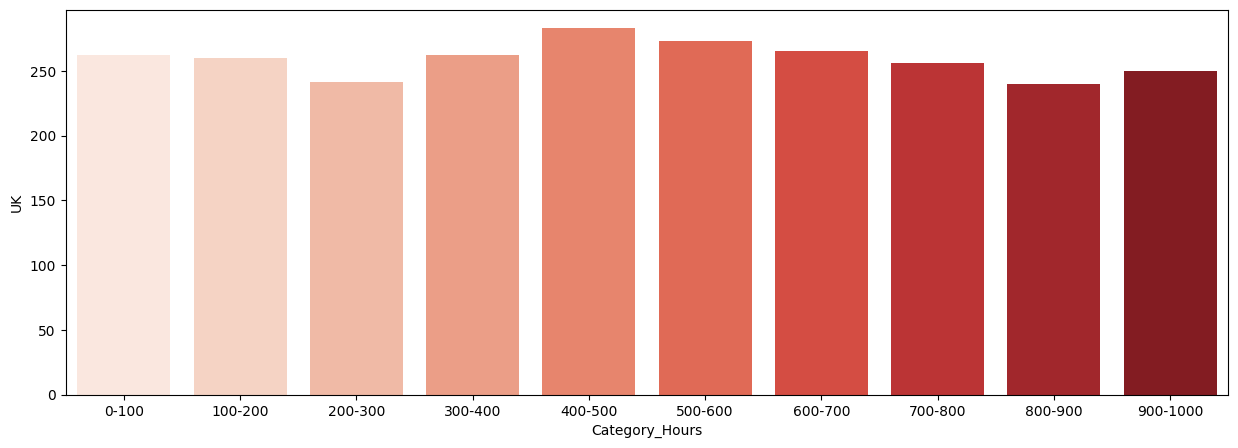

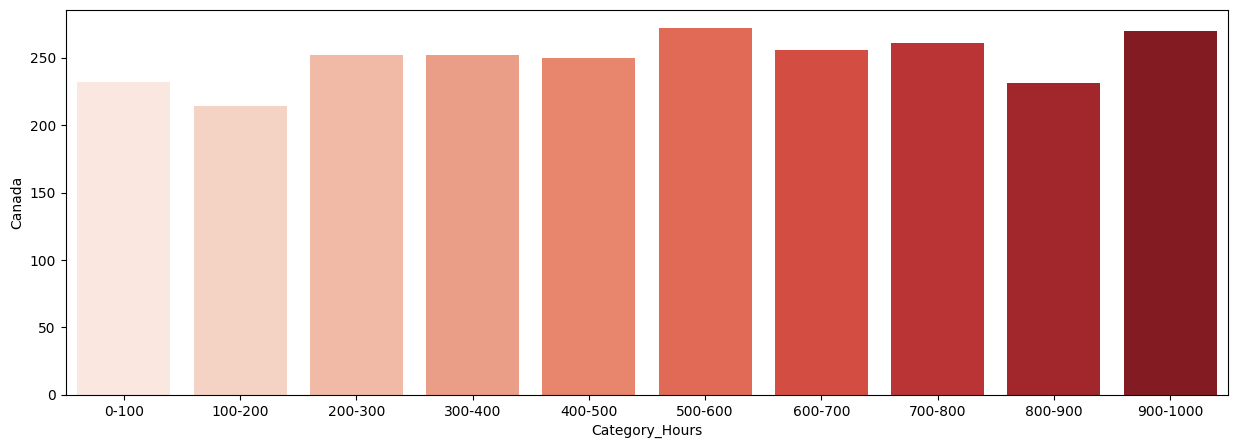

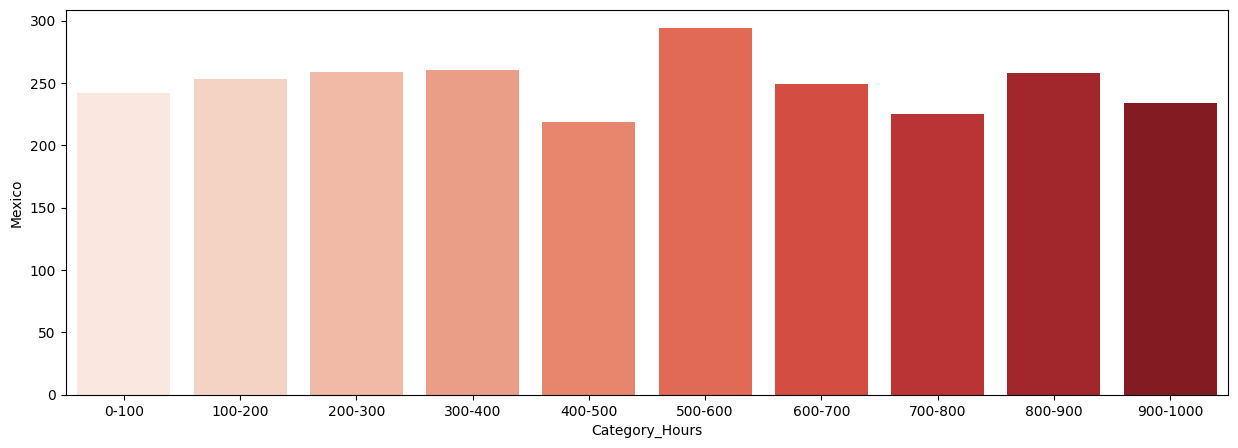

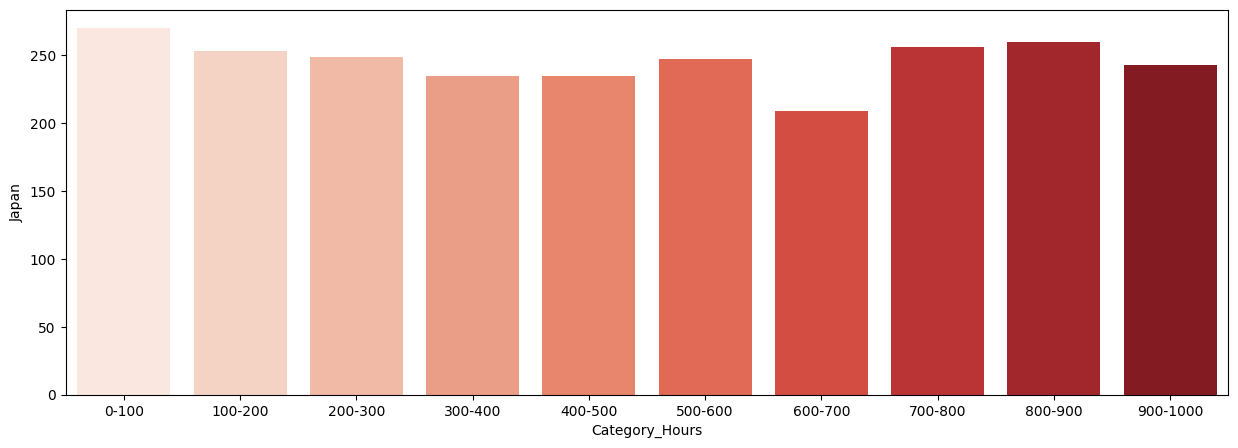

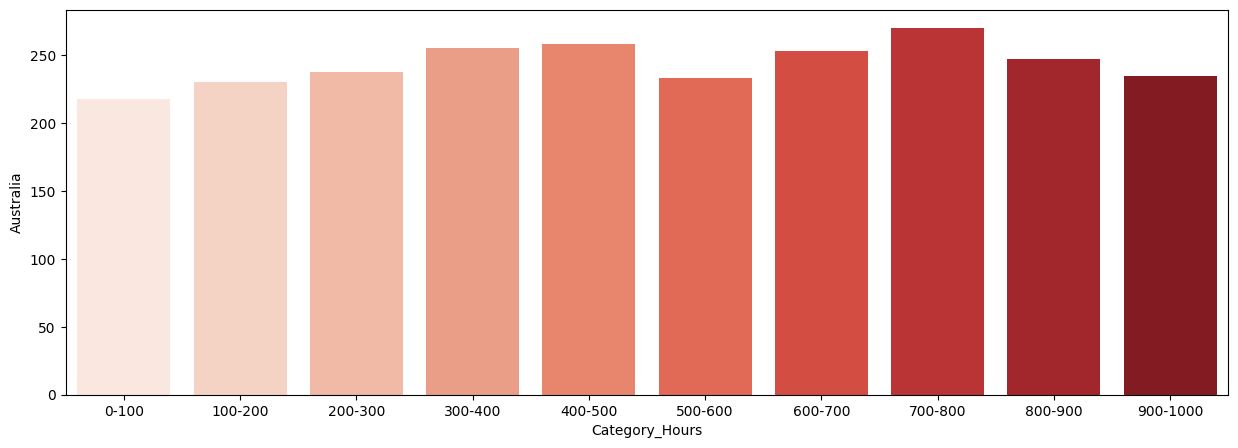

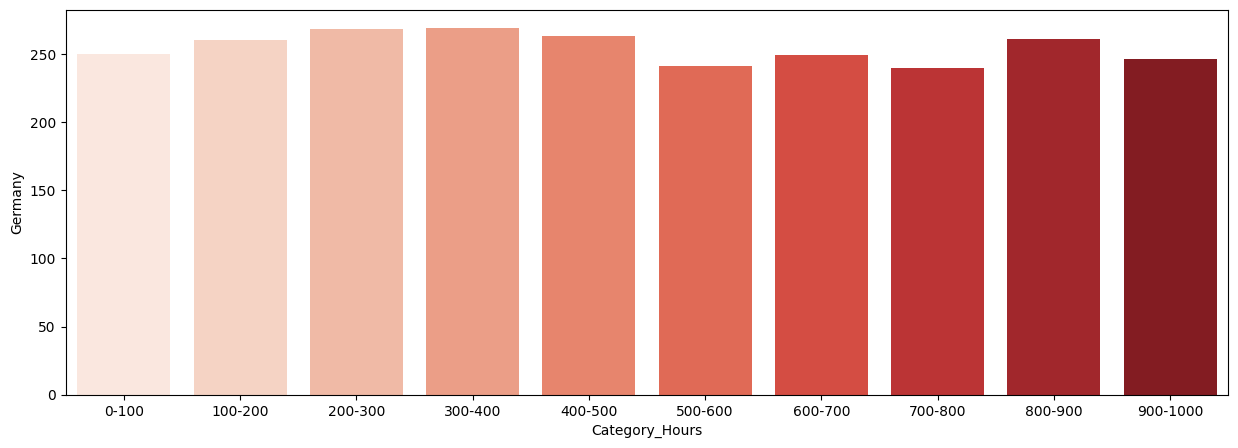

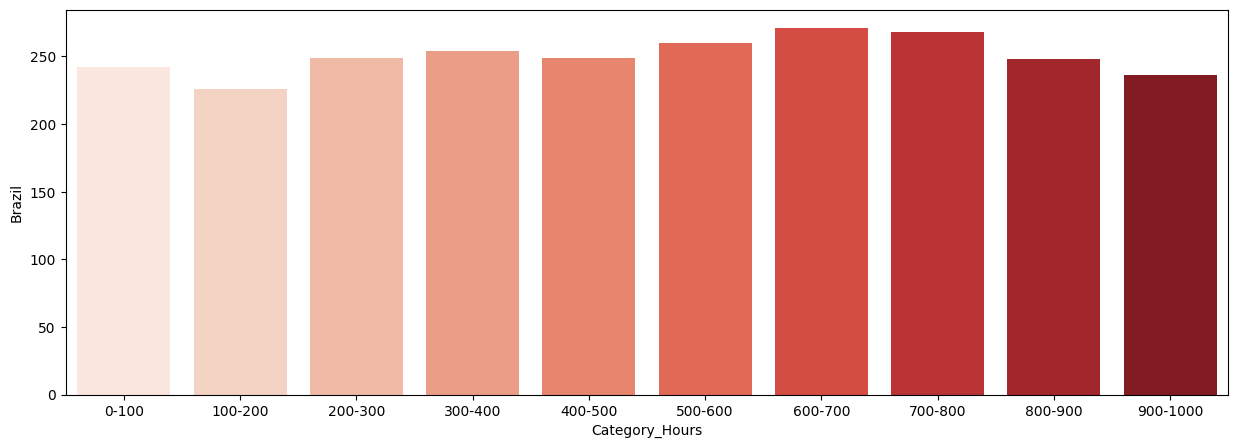

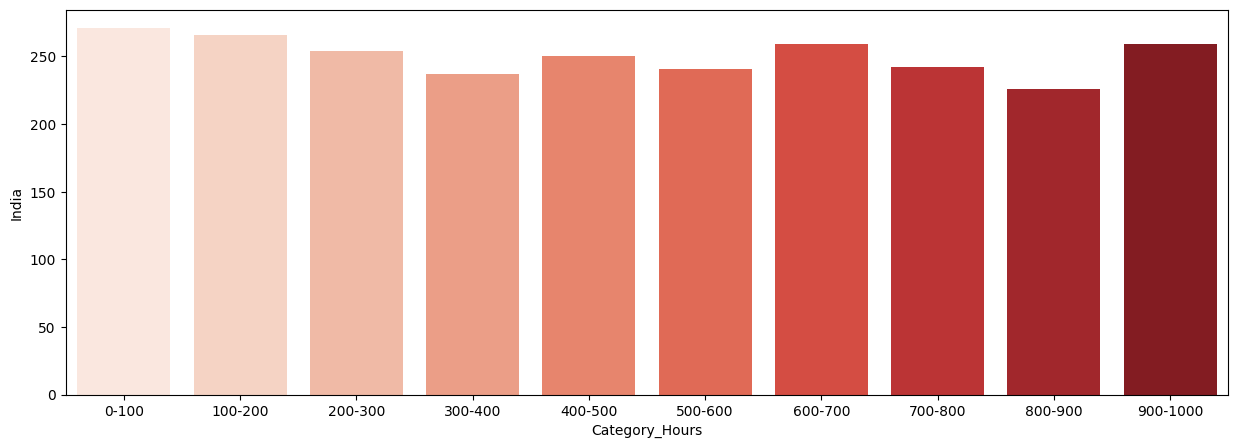

In [32]:
plt.figure(figsize=(15,5))
net_countries = df['Country'].unique()
for n in net_countries:
        d = df[df['Country'] == n]
        plt.figure(figsize=(15,5))
        sns.countplot(d, x='Category_Hours', palette='Reds')
        plt.ylabel(n)
        plt.show()

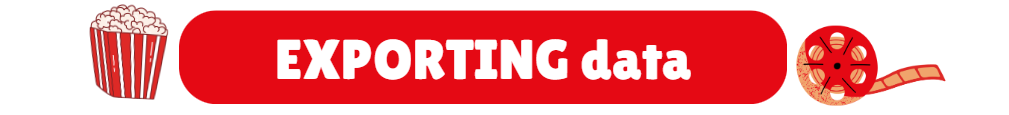

In [33]:
top_viewers = df.groupby('User_ID').agg({'Name':'first','Age':'first','Country':'first','Age_Category':'first','Watch_Time_Hours':'sum','Category_Hours':'first','Favorite_Genre':'first','Subscription_Type':'first','Last_Login':'first'}).sort_values(by='Watch_Time_Hours',ascending=False).reset_index()

In [34]:
top_viewers

User_ID            Name  Age    Country Age_Category  Watch_Time_Hours  \
0         3941     Chris Brown   70     Canada        60-70            999.99   
1        21373   Chris Johnson   62     Brazil        60-70            999.96   
2        23706    Chris Miller   52     Brazil        50-60            999.87   
3        11589  Chris Martinez   55    Germany        50-60            999.75   
4         6407   Alex Martinez   52  Australia        50-60            999.73   
...        ...             ...  ...        ...          ...               ...   
24995     3333   Katie Johnson   27      Japan        20-30              0.29   
24996    17275      Alex Smith   25      Japan        20-30              0.26   
24997    19668     Katie Brown   51    Germany        50-60              0.24   
24998      356    Sarah Garcia   72     France        70-80              0.22   
24999    20478    Alex Johnson   46  Australia        40-50              0.12   

      Category_Hours Favorite_Genre Subscription_Type  Last_Login  
0           900-1000        Romance          Standard  2025-02-14  
1           900-1000         Action           Premium  2024-05-10  
2           900-1000        Romance             Basic  2024-10-26  
3           900-1000         Horror           Premium  2025-02-07  
4           900-1000          Drama           Premium  2024-06-27  
...              ...            ...               ...         ...  
24995          0-100        Romance          Standard  2024-06-12  
24996          0-100          Drama          Standard  2024-05-18  
24997          0-100         Horror           Premium  2024-10-31  
24998          0-100         Comedy          Standard  2024-09-23  
24999          0-100         Comedy           Premium  2024-10-29  

[25000 rows x 10 columns]

In [35]:
top_viewers.to_excel('Netflix.xlsx', index=False)

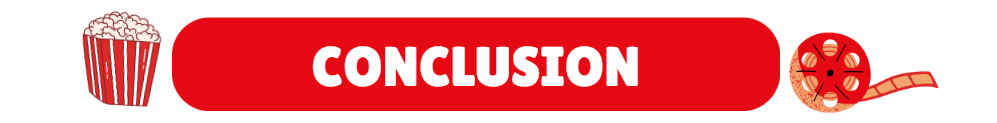

Keeping this analysis as the base, a **web-based plotly/dash** dashboard has been created that present the various insights and findings from the dataset.